In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\Duplicates_removed_data.csv", sep=',',
    encoding='latin1', 
    on_bad_lines='skip' )


In [34]:
df.head()
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage', 'invalid_flag', 'outlier_flag',
       'borderline_flag', 'review_remove', 'keep', 'invalid_reason'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [7]:
#Define the vital columns
vitals = ["HR", "SBP", "DBP", "RR", "Saturation", "BT"]

for col in vitals:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Missing column: {col}")

In [8]:
#Define invalid values
df["invalid_flag"] = (
    (df["HR"] <= 0) | (df["HR"] > 250) |
    (df["SBP"] < 50) | (df["SBP"] > 260) |
    (df["DBP"] < 30) | (df["DBP"] > 150) |
    (df["RR"] <= 0) | (df["RR"] > 60) |
    (df["Saturation"] < 50) | (df["Saturation"] > 100) |
    (df["BT"] < 25) | (df["BT"] > 45)   # extreme body temperature
)

df["invalid_flag"].value_counts()


invalid_flag
False    1264
True        3
Name: count, dtype: int64

In [10]:
# Detect statistical outliers (IQR method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (data[column] < lower) | (data[column] > upper)

df["outlier_flag"] = False
for col in vitals:
    df["outlier_flag"] |= detect_outliers_iqr(df, col)

In [11]:
#Flag borderline clinical values
df["borderline_flag"] = (
    df["HR"].between(35, 40) | df["HR"].between(180, 200) |
    df["SBP"].between(50, 80) | df["SBP"].between(180, 220) |
    df["DBP"].between(30, 50) | df["DBP"].between(100, 130) |
    df["RR"].between(35, 40) | df["RR"].between(50, 60) |
    df["Saturation"].between(80, 85) |
    df["BT"].between(35, 36) | df["BT"].between(39, 41)
)

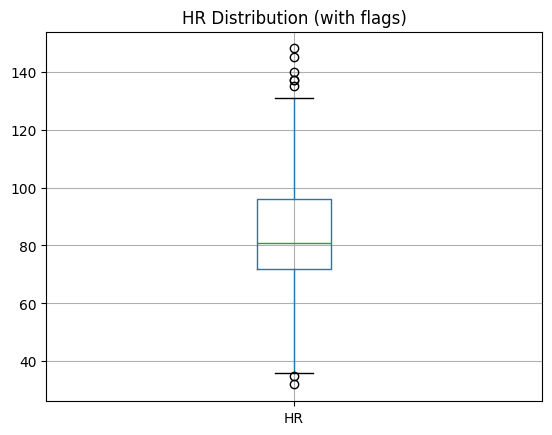

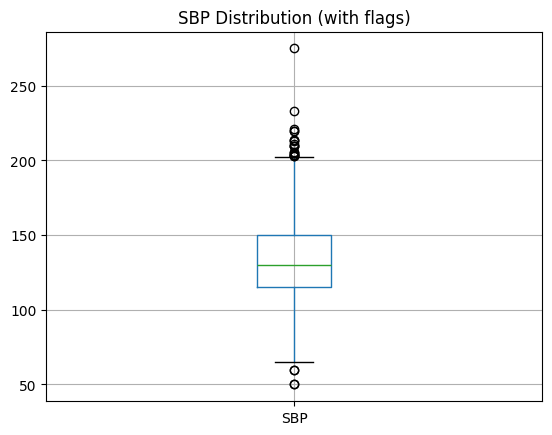

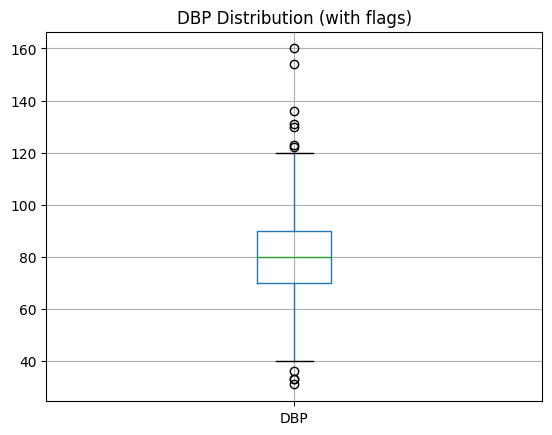

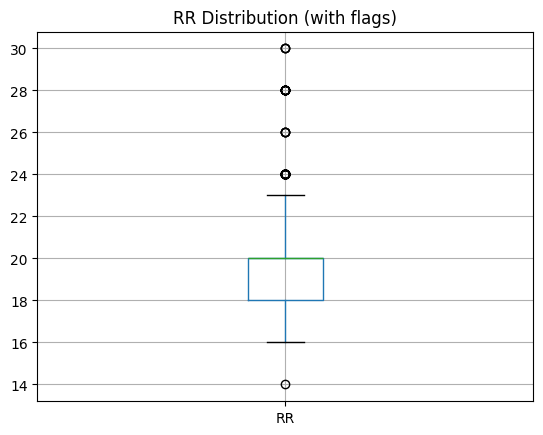

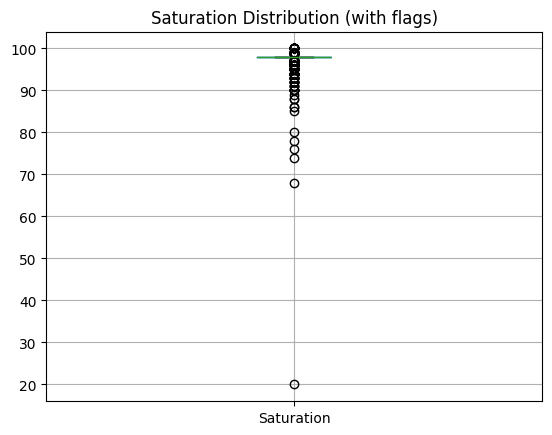

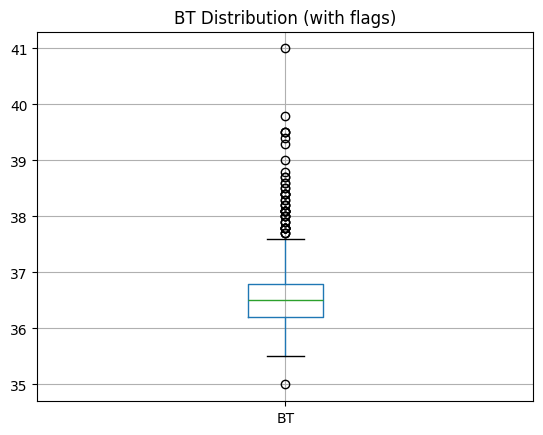

In [12]:
# Optional exploratory check
for col in vitals:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"{col} Distribution (with flags)")
    plt.show()

In [33]:
#To see the invalid rows
invalid_rows = df[df["invalid_flag"] == True]
vitals = ["HR", "SBP", "DBP", "RR", "Saturation", "BT"]
invalid_rows[vitals]

,HR,SBP,DBP,RR,Saturation,BT


In [14]:
outlier_rows = df[df["outlier_flag"] == True]
outlier_rows[vitals]


,HR,SBP,DBP,RR,Saturation,BT
0,84,160,100.0,18,100,36.6
5,94,140,90.0,20,98,38.1
9,80,130,80.0,20,97,36.3
17,100,130,80.0,20,97,36.4
23,88,140,80.0,20,97,36.5
...,...,...,...,...,...,...
1260,71,130,80.0,20,100,36.3
1261,74,80,50.0,20,95,36.5
1262,86,120,80.0,22,95,36.4
1263,94,120,80.0,20,97,36.4


In [15]:
vitals = ["HR", "SBP", "DBP", "RR", "Saturation", "BT"]

for col in vitals:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if (df.loc[0, col] < lower) or (df.loc[0, col] > upper):
        print(f"{col} = {df.loc[0, col]} is an outlier (Lower={lower}, Upper={upper})")


Saturation = 100 is an outlier (Lower=98.0, Upper=98.0)


In [27]:
borderline_rows = df[df["borderline_flag"] == True]
borderline_rows


,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,invalid_flag,outlier_flag,borderline_flag,review_remove,keep,invalid_reason
0,2,2,71,3,3,2,right ocular pain,1,1,2,160.00,100.0,84.00,18,36.600,100,2,Corneal abrasion,1,4,2,86,500,1,False,True,True,False,True,
7,1,2,78,14,3,1,"pain, chest",1,1,3,169.00,86.0,80.00,20,36.000,98,2,Acute coronary syndrome,1,3,2,247,1023,1,False,False,True,False,True,
10,1,2,43,3,3,1,acute epigastric pain,1,1,3,148.00,104.0,72.00,16,36.500,98,3,Acute gastritis,1,4,4,176,753,1,False,False,True,False,True,
15,2,1,65,12,4,1,headache,1,1,3,140.00,100.0,80.00,20,36.000,98,3,"Subarachnoid haemorrhage, unspecified",2,4,4,153,300,1,False,False,True,False,True,
27,2,2,74,12,4,2,chest wall pain right,1,1,8,80.00,50.0,98.00,22,36.100,98,1,"Multiple fracture of involving three ribs,Closed",2,2,1,207,400,1,False,False,True,False,True,
28,1,2,44,5,3,1,"pain, arm",1,1,9,140.00,90.0,101.00,18,36.000,98,3,"Complex regional pain syndrome, type I multipl...",1,4,4,65,817,1,False,False,True,False,True,
29,1,2,49,3,2,1,Seizure Like Activity,1,0,3,180.00,82.0,101.00,18,37.400,98,2,Seizure,1,3,5,304,530,1,False,False,True,False,True,
33,1,2,16,7,2,1,syncope,1,0,3,162.00,75.0,75.00,20,36.000,98,2,Syncope,1,3,2,113,382,1,False,False,True,False,True,
39,1,1,48,8,3,1,hyperventilation,1,0,3,196.00,104.0,98.00,20,37.200,98,3,Panic attack,1,4,2,82,657,1,False,False,True,False,True,
44,1,2,52,9,2,2,"swelling, facial",1,0,3,150.00,109.0,111.00,18,36.500,98,4,Fracture of nasal bone closed,1,5,4,436,393,1,False,False,True,False,True,


In [28]:
print("Invalid rows:", df["invalid_flag"].sum())
print("Outlier rows:", df["outlier_flag"].sum())
print("Borderline rows:", df["borderline_flag"].sum())


Invalid rows: 0
Outlier rows: 435
Borderline rows: 396


In [29]:
# All flagged rows
df_flags = df[(df["invalid_flag"]) | (df["outlier_flag"]) | (df["borderline_flag"])]
df_flags
#To review before delettion of unsuitable data

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,invalid_flag,outlier_flag,borderline_flag,review_remove,keep,invalid_reason
0,2,2,71,3,3,2,right ocular pain,1,1,2,160.00,100.0,84.00,18,36.600,100,2,Corneal abrasion,1,4,2,86,500,1,False,True,True,False,True,
5,2,1,54,6,4,1,fever,1,1,3,140.00,90.0,94.00,20,38.100,98,3,"Fever, unspecified",2,4,1,9246,200,1,False,True,False,False,True,
7,1,2,78,14,3,1,"pain, chest",1,1,3,169.00,86.0,80.00,20,36.000,98,2,Acute coronary syndrome,1,3,2,247,1023,1,False,False,True,False,True,
9,2,1,38,6,3,1,"Eczema, Eyelid",1,1,3,130.00,80.0,80.00,20,36.300,97,4,Ocular pain,1,5,4,185,400,1,False,True,False,False,True,
10,1,2,43,3,3,1,acute epigastric pain,1,1,3,148.00,104.0,72.00,16,36.500,98,3,Acute gastritis,1,4,4,176,753,1,False,False,True,False,True,
15,2,1,65,12,4,1,headache,1,1,3,140.00,100.0,80.00,20,36.000,98,3,"Subarachnoid haemorrhage, unspecified",2,4,4,153,300,1,False,False,True,False,True,
17,2,2,53,12,2,2,Open Wound,1,1,4,130.00,80.0,100.00,20,36.400,97,2,"Open wound of other parts of head, face",2,3,2,613,400,1,False,True,False,False,True,
23,2,2,59,8,4,1,Rt. side motor weakness,1,1,5,140.00,80.0,88.00,20,36.500,97,2,"Intracranial haemorrhage (nontraumatic), unspe...",2,3,2,143,400,1,False,True,False,False,True,
27,2,2,74,12,4,2,chest wall pain right,1,1,8,80.00,50.0,98.00,22,36.100,98,1,"Multiple fracture of involving three ribs,Closed",2,2,1,207,400,1,False,False,True,False,True,
28,1,2,44,5,3,1,"pain, arm",1,1,9,140.00,90.0,101.00,18,36.000,98,3,"Complex regional pain syndrome, type I multipl...",1,4,4,65,817,1,False,False,True,False,True,


In [30]:
#Cap the outlier values to keep the rare cases

for col in ["HR","SBP","DBP","RR","Saturation","BT"]:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

In [31]:
df["invalid_reason"] = ""
df.loc[(df["HR"] <= 0) | (df["HR"] > 250), "invalid_reason"] += "HR_out_of_range; "

df.loc[(df["SBP"] < 50) | (df["SBP"] > 260), "invalid_reason"] += "SBP_out_of_range; "

df.loc[(df["DBP"] < 30) | (df["DBP"] > 150), "invalid_reason"] += "DBP_out_of_range; "

df.loc[(df["RR"] <= 0) | (df["RR"] > 60), "invalid_reason"] += "RR_out_of_range; "

df.loc[(df["Saturation"] < 50) | (df["Saturation"] > 100), "invalid_reason"] += "SPO2_out_of_range; "

df.loc[(df["BT"] < 25) | (df["BT"] > 45), "invalid_reason"] += "BT_out_of_range; "

df.loc[
    df[["HR","SBP","DBP","RR","Saturation","BT"]].isna().any(axis=1),
    "invalid_reason"
] += "Missing_vital; "
df["invalid_flag"] = df["invalid_reason"] != ""
df[df["invalid_flag"]][
    ["HR","SBP","DBP","RR","Saturation","BT","invalid_reason"]
].head(10)


,HR,SBP,DBP,RR,Saturation,BT,invalid_reason


In [32]:
print("Invalid rows before deletion:", df["invalid_flag"].sum())
df_clean = df[~df["invalid_flag"]].copy()
print("Invalid rows after deletion:", df_clean["invalid_flag"].sum())

Invalid rows before deletion: 0
Invalid rows after deletion: 0


In [24]:
df_clean.to_csv("clean_dataset.csv", index=False)

In [25]:
import os

if os.path.exists("clean_dataset.csv"):
    print("✅ File saved successfully!")
else:
    print("❌ File not found!")


✅ File saved successfully!


In [26]:
df_clean.to_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\clean_dataset.csv", index=False)


In [ ]:
df = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\Duplicates_removed_data.csv", sep=',',
    encoding='latin1', 
    on_bad_lines='skip' )